In [1]:
"""
Son-Gyo Jung; Tutor Group F; Code Script 1
"""

import numpy.random as nr
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


final_clist = []

def joincluster(c1, c2, raw_clusters):
    """
    Joining raw_clusters into bigger clusters   
    """
    for c in raw_clusters[c2]:
        if c in raw_clusters[c1]:
            raw_clusters[c1] += raw_clusters[c2]
            raw_clusters[c2] = []
                
                
                
def findclusters(no_of_disks, radius, dimensions):
    """
    Identify clusters given the parameters
    """
    #Random coordinates generator
    random = nr.uniform(size = (no_of_disks,dimensions))
    
    
    #List of disks numbers that form a cluster
    raw_clusters = []
    
    for p1 in range(no_of_disks):
        for p2 in range((p1 + 1), no_of_disks):              
            Cx = random[p1][0] - random[p2][0]
            Cy = random[p1][1] - random[p2][1]
            
            if dimensions is 3:
                Cz = random[p1][2] - random[p2][2]
                distance = np.sqrt(Cx*Cx + Cy*Cy + Cz*Cz)
                
                
            distance = np.sqrt(Cx*Cx + Cy*Cy)
            
            if distance <= radius*2.0 and distance !=0.0:
                if ([p1, p2]) and ([p2, p1]) not in raw_clusters:
                    raw_clusters.append([p1, p2])
                
                
    #List of disks touching x=0
    left = []
    
    for p1 in range(no_of_disks):
        left_x = random[p1][0]
        
        if left_x <= radius:
            left.append(p1)

            
    #List of disks touching x=1
    right = [] 
    
    for p1 in range(no_of_disks):
        right_x = 1.0 - random[p1][0]
        
        if right_x <= radius:
            right.append(p1)
        
                
    for i in range(len(raw_clusters)):
        for j in range(len(raw_clusters)):
            if i!= j:
                joincluster(i, j, raw_clusters)
        
        
    merged_clusters=[]    
    
    raw_clusters=[x for x in raw_clusters if x != []]
    
    for i in range(len(raw_clusters)):
        merged_clusters.append(list(set(raw_clusters[i])))           
    
    
    #Coordinates of merged_clusters into the library
    clist = []
    
    for i in range(len(merged_clusters)):
        clist.append({'DiskID':merged_clusters[i], 'touch_left':'False', 'touch_right':'False'})

        
    #Checking if it touches x=0
    for i in range(len(clist)):
        for j in range(len(clist[i]['DiskID'])):
            if clist[i]['DiskID'][j] in left:
                clist[i]['touch_left']='True'
        
        
    #Checking if it touches x=1
    for i in range(len(clist)):
        for j in range(len(clist[i]['DiskID'])):
            if clist[i]['DiskID'][j] in right:
                clist[i]['touch_right']='True'
        
        
    #2D or 3D visual testing
    if dimensions is 2: #2D
        plt.figure(figsize = (15, 10)) 
        plt.cla()
        scatterplot = plt.gcf()
        for centre in random:
            disks = plt.Circle(centre,radius,alpha=0.5)
            scatterplot.gca().add_artist(disks)
            
        plt.grid()
        plt.xlabel('x', fontsize = 14)
        plt.ylabel('y', fontsize = 14)
        plt.savefig('two_dimensional_model.png', dpi = 100, bbox_inches = "tight")
        
        plt.show()
            
            
    elif dimensions is 3: #3D
        def sphere(xCenter, yCenter, zCenter, r):
            u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
            x = np.cos(u)*np.sin(v)
            y = np.sin(u)*np.sin(v)
            z = np.cos(v)
            x = r*x + xCenter
            y = r*y + yCenter
            z = r*z + zCenter
            return (x,y,z)
                
        x = random[:,0]
        y = random[:,1]
        z = random[:,2]
        r = np.ones(no_of_disks)*radius
        
        fig = plt.figure(figsize = (15, 10))
        ax = fig.add_subplot(111, projection='3d')
        
        for (xi, yi, zi, ri) in zip(x, y, z, r):
            (xs, ys, zs) = sphere(xi, yi, zi, ri)
            ax.plot_surface(xs, ys, zs, rstride = 1, cstride = 1, color = 'b')
        
        ax.set_xlabel('x', fontsize = 14)
        ax.set_ylabel('y', fontsize = 14)
        ax.set_zlabel('z', fontsize = 14)
        plt.savefig('three_dimensional_model.png', dpi = 100, bbox_inches = "tight")
            
        plt.show()
          
    #Transferring data to outside of the function   
    for i in range(len(clist)):
        final_clist.append(clist[i])
        
    print(clist)
    
    
#Identifying which cluster a disk belongs to 
def whichcluster(cluster_list, disk_ID):
    for i in range(len(cluster_list)):
        if disk_ID in cluster_list[i]['DiskID']:
            print('The index of the cluster list that contains disk ID', disk_ID, 'is', i,'.')

            
#Identifying cluster which joins left to right
def left2right(cluster_list,status):
    for i in range(len(cluster_list)):
        if cluster_list[i]['touch_left'] == status and cluster_list[i]['touch_right'] == status:
            print('There is a spanning cluster! The IDs of disks which forms the spanning cluster is', cluster_list[i]['DiskID'])
            
        else:
            if i == range(len(cluster_list))[-1]:
                print('There is no spanning cluster formed.')


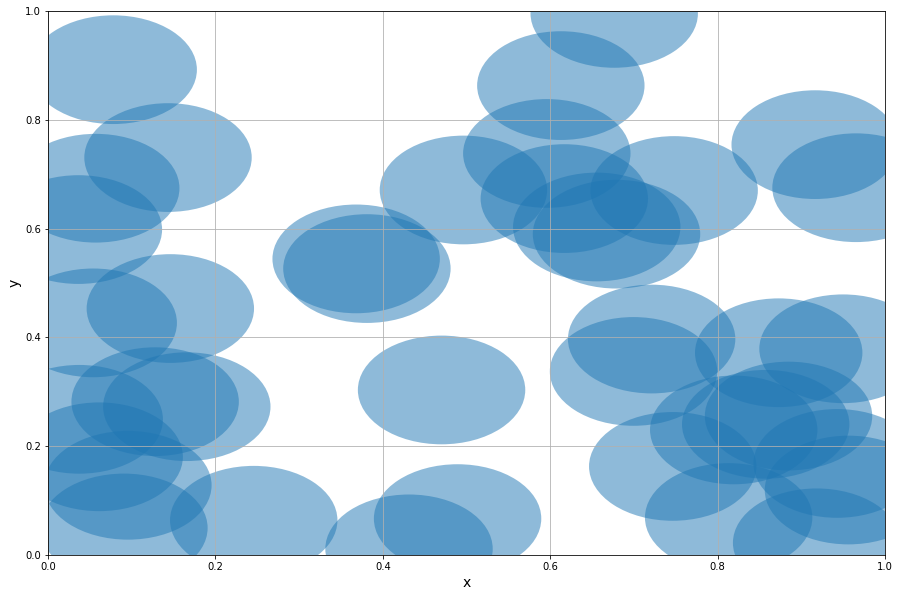

[{'DiskID': [0, 3, 36, 6, 7, 38, 10, 11, 14, 16, 19, 21, 22, 24, 25], 'touch_left': 'True', 'touch_right': 'False'}, {'DiskID': [1, 2, 4, 5, 8, 9, 12, 13, 15, 17, 18, 20, 23, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 39], 'touch_left': 'False', 'touch_right': 'True'}]


In [2]:
findclusters(40, 0.10, 2)

In [3]:
whichcluster(final_clist, 10)

The index of the cluster list that contains disk ID 10 is 0 .


In [4]:
left2right(final_clist,'True')

There is no spanning cluster formed.


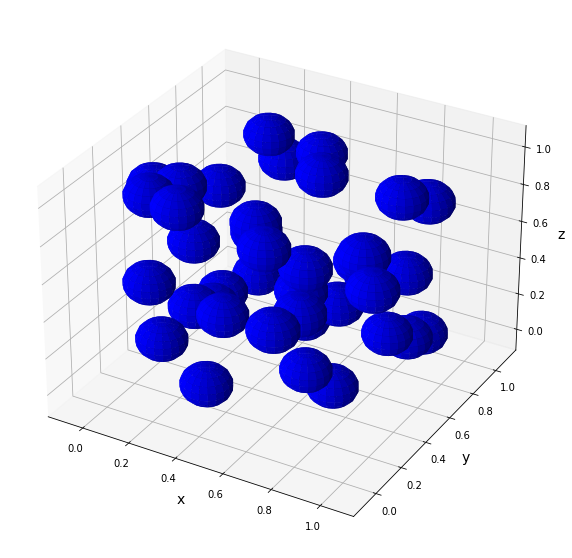

[{'DiskID': [0, 32, 3, 6, 38, 12, 21, 24, 26, 31], 'touch_left': 'False', 'touch_right': 'True'}, {'DiskID': [1, 2, 34, 5, 9, 14, 16, 20], 'touch_left': 'True', 'touch_right': 'False'}, {'DiskID': [33, 4, 7, 8, 15, 17, 18, 19, 22, 27, 29], 'touch_left': 'False', 'touch_right': 'True'}, {'DiskID': [35, 36, 37, 39, 11, 13, 25, 28, 30], 'touch_left': 'True', 'touch_right': 'False'}]


In [5]:
findclusters(40, 0.10, 3)